In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
      
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | segou
Processing Record 5 of Set 1 | remire-montjoly
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | ansalta
Processing Record 8 of Set 1 | merced
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | al ghayzah
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | papao
Processing Record 17 of Set 1 | lobva
Processing Record 18 of Set 1 | paraiso
Processing Record 19 of Set 1 | sao felix do xingu
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | mopti
Processing Record 22 of Set 1 | acarau
Processing Re

Processing Record 41 of Set 4 | taoudenni
Processing Record 42 of Set 4 | vanino
Processing Record 43 of Set 4 | tolanaro
Processing Record 44 of Set 4 | al wajh
Processing Record 45 of Set 4 | yanykurgan
Processing Record 46 of Set 4 | port-cartier
Processing Record 47 of Set 4 | kaa-khem
Processing Record 48 of Set 4 | concepcion
Processing Record 49 of Set 4 | ad dabbah
Processing Record 0 of Set 5 | sitka
Processing Record 1 of Set 5 | haiku-pauwela
Processing Record 2 of Set 5 | lihue
Processing Record 3 of Set 5 | castillos
Processing Record 4 of Set 5 | kristiansund
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | qaqortoq
Processing Record 7 of Set 5 | bam
Processing Record 8 of Set 5 | nantucket
Processing Record 9 of Set 5 | cromer
Processing Record 10 of Set 5 | pathein
Processing Record 11 of Set 5 | falmouth
Processing Record 12 of Set 5 | phan thiet
Processing Record 13 of Set 5 | thinadhoo
Processing Record 14 of Set 5 | dudinka
Processing Record 1

Processing Record 32 of Set 8 | buala
Processing Record 33 of Set 8 | quellon
Processing Record 34 of Set 8 | pisco
Processing Record 35 of Set 8 | al khums
Processing Record 36 of Set 8 | teruel
Processing Record 37 of Set 8 | zalari
Processing Record 38 of Set 8 | tangier
Processing Record 39 of Set 8 | kone
Processing Record 40 of Set 8 | ceeldheer
Processing Record 41 of Set 8 | al bayda'
Processing Record 42 of Set 8 | mchinji
Processing Record 43 of Set 8 | magadan
Processing Record 44 of Set 8 | egilsstadir
Processing Record 45 of Set 8 | cuatro cienegas de carranza
Processing Record 46 of Set 8 | happy valley-goose bay
Processing Record 47 of Set 8 | chibougamau
Processing Record 48 of Set 8 | hami
Processing Record 49 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 0 of Set 9 | majie
Processing Record 1 of Set 9 | labrador city
Processing Record 2 of Set 9 | chinde
Processing Record 3 of Set 9 | al muwayh
Processing Record 4 of Set 9 | monte patria
P

Processing Record 19 of Set 12 | tynda
Processing Record 20 of Set 12 | ngaoundere
Processing Record 21 of Set 12 | huilong
Processing Record 22 of Set 12 | wabag
Processing Record 23 of Set 12 | barra do bugres
Processing Record 24 of Set 12 | ratnagiri
Processing Record 25 of Set 12 | luanda
Processing Record 26 of Set 12 | strezhevoy
Processing Record 27 of Set 12 | karratha
Processing Record 28 of Set 12 | minas de marcona
Processing Record 29 of Set 12 | champerico
Processing Record 30 of Set 12 | bayan
Processing Record 31 of Set 12 | mossel bay
Processing Record 32 of Set 12 | petrolina
Processing Record 33 of Set 12 | nassau
Processing Record 34 of Set 12 | kiffa
Processing Record 35 of Set 12 | tshikapa
Processing Record 36 of Set 12 | boa vista
Processing Record 37 of Set 12 | vorgashor
Processing Record 38 of Set 12 | bellefonte
Processing Record 39 of Set 12 | longonjo
Processing Record 40 of Set 12 | nchelenge
Processing Record 41 of Set 12 | balnearia
Processing Record 42

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.32,74,89,12.38,PN,1713771336
1,puerto ayora,-0.7393,-90.3518,24.19,99,80,1.34,EC,1713771347
2,margaret river,-33.9500,115.0667,18.03,42,10,7.88,AU,1713770933
3,segou,13.4317,-6.2157,30.77,46,37,7.43,ML,1713771367
4,remire-montjoly,4.9167,-52.2667,25.02,94,75,1.03,GF,1713771377


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.32,74,89,12.38,PN,1713771336
1,puerto ayora,-0.7393,-90.3518,24.19,99,80,1.34,EC,1713771347
2,margaret river,-33.9500,115.0667,18.03,42,10,7.88,AU,1713770933
3,segou,13.4317,-6.2157,30.77,46,37,7.43,ML,1713771367
4,remire-montjoly,4.9167,-52.2667,25.02,94,75,1.03,GF,1713771377


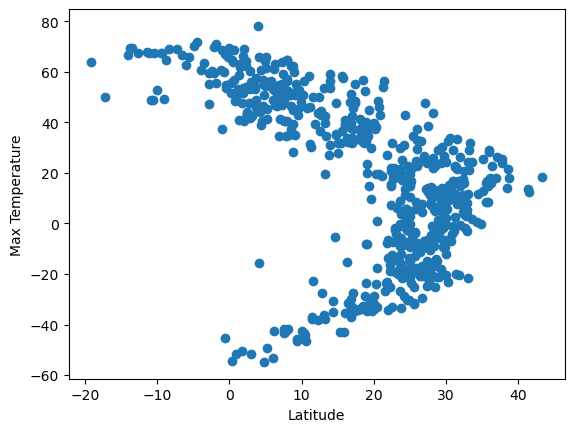

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("WeatherPy_Fig1.png")

# Show plot
plt.show()

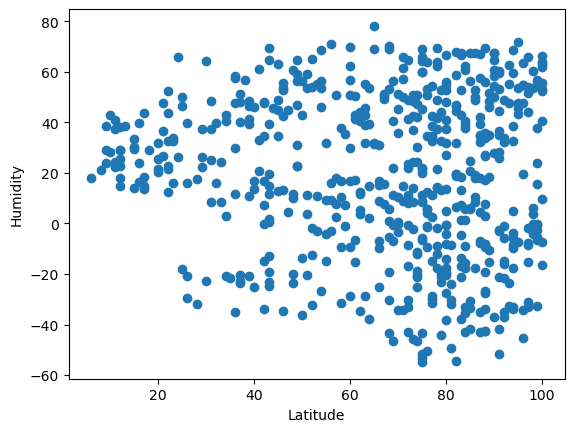

In [42]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("WeatherPy_Fig2.png")

# Show plot
plt.show()

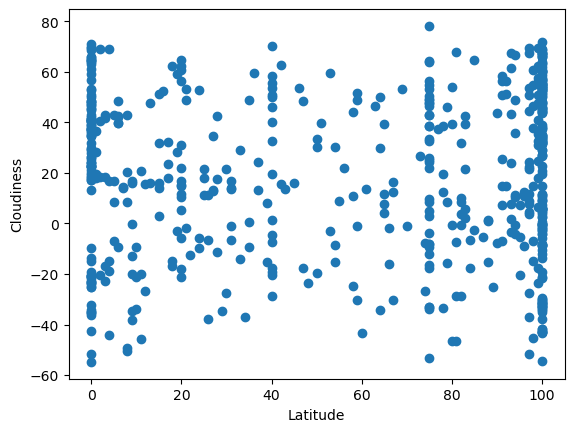

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("WeatherPy_Fig3.png")

# Show plot
plt.show()

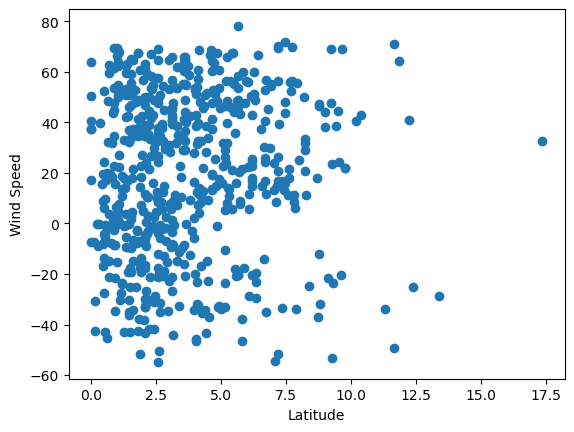

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("WeatherPy_Fig4.png")

# Show plot
plt.show()

In [45]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,segou,13.4317,-6.2157,30.77,46,37,7.43,ML,1713771367
4,remire-montjoly,4.9167,-52.2667,25.02,94,75,1.03,GF,1713771377
5,whitehorse,60.7161,-135.0538,4.43,48,20,4.12,CA,1713771388
6,ansalta,42.6894,46.1178,13.19,77,83,1.95,RU,1713771403
7,merced,37.1666,-120.7516,19.05,73,0,1.46,US,1713771414


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.32,74,89,12.38,PN,1713771336
1,puerto ayora,-0.7393,-90.3518,24.19,99,80,1.34,EC,1713771347
2,margaret river,-33.9500,115.0667,18.03,42,10,7.88,AU,1713770933
8,port-aux-francais,-49.3500,70.2167,5.22,81,8,11.67,TF,1713771424
11,arraial do cabo,-22.9661,-42.0278,21.91,79,0,6.36,BR,1713771455


The r-value is: -0.8419155328579567


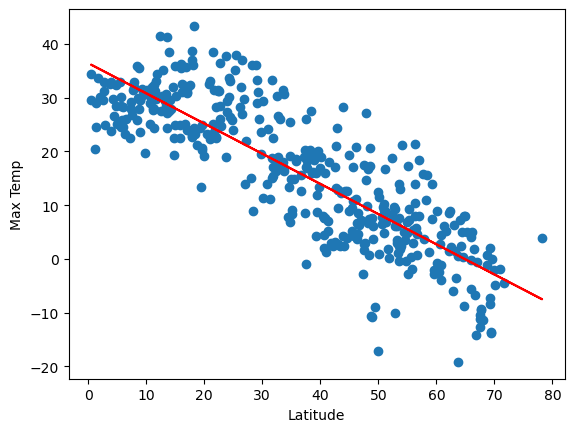

In [48]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemisphere_df["Lat"].rename("Latitude"), northern_hemisphere_df["Max Temp"], (10, -30))

The r-value is: 0.7799615088336724


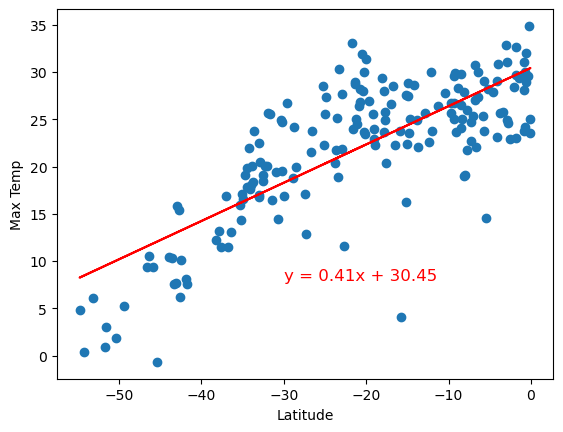

In [49]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemisphere_df["Lat"].rename("Latitude"), southern_hemisphere_df["Max Temp"], (-30, 8))

The r-value is: 0.1857695628962896


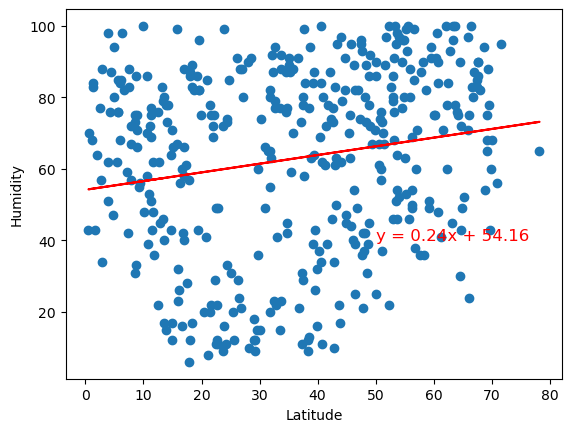

In [50]:
# Northern Hemisphere
linear_regress(northern_hemisphere_df["Lat"].rename("Latitude"), northern_hemisphere_df["Humidity"], (50, 40))

The r-value is: 0.051201830053899215


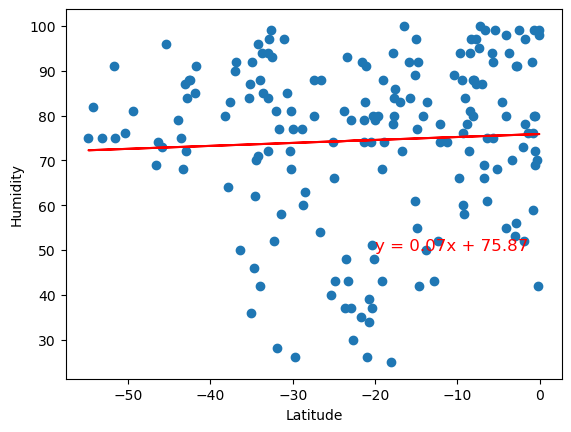

In [51]:
# Southern Hemisphere
linear_regress(southern_hemisphere_df["Lat"].rename("Latitude"), southern_hemisphere_df["Humidity"], (-20, 50))

The r-value is: 0.037774314864813446


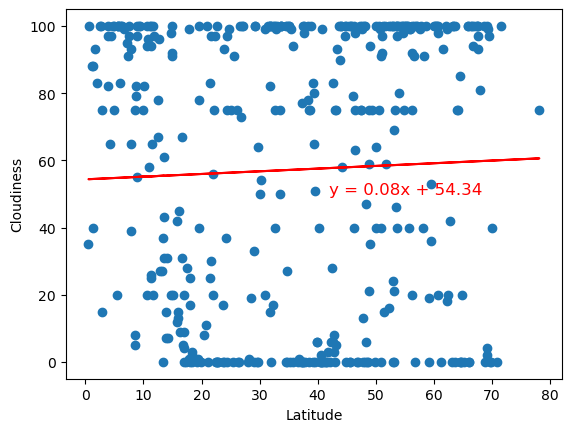

In [52]:
# Northern Hemisphere
linear_regress(northern_hemisphere_df["Lat"].rename("Latitude"), northern_hemisphere_df["Cloudiness"], (42, 50))

The r-value is: 0.09002908351354302


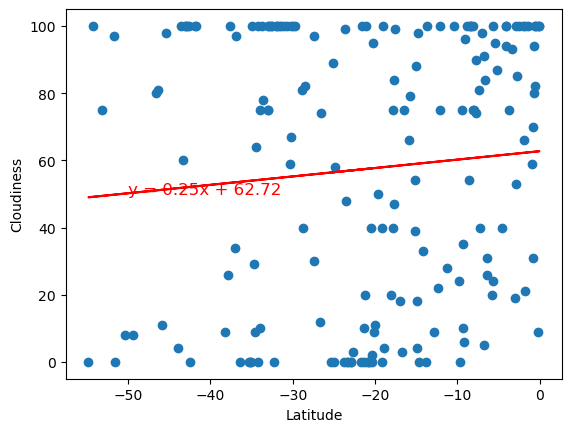

In [53]:
# Southern Hemisphere
linear_regress(southern_hemisphere_df["Lat"].rename("Latitude"), southern_hemisphere_df["Cloudiness"], (-50, 50))

The r-value is: 0.03800283099030384


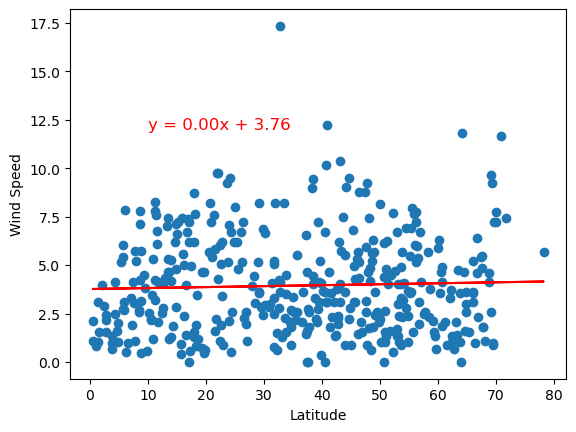

In [54]:
# Northern Hemisphere
linear_regress(northern_hemisphere_df["Lat"].rename("Latitude"), northern_hemisphere_df["Wind Speed"], (10, 12))

The r-value is: -0.31767288376934627


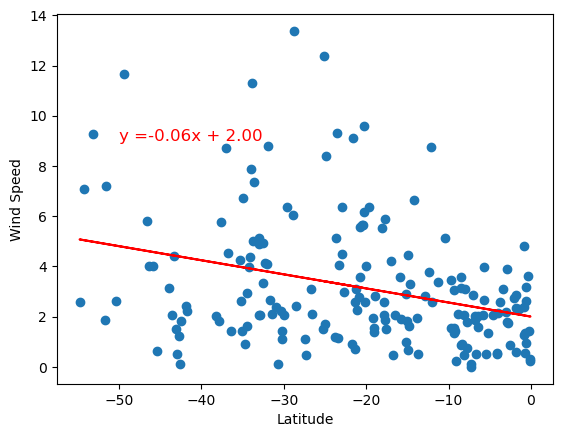

In [55]:
# Southern Hemisphere
linear_regress(southern_hemisphere_df["Lat"].rename("Latitude"), southern_hemisphere_df["Wind Speed"], (-50, 9))